# Question: Is the average number of views a Youtube Influencer gets on a video greater than 10,000,000?

# Study Description: The population for this study includes all public YouTube videos from influencers in the dataset. For this study, a YouTube influencer is defined as someone who has a subscriber count greater than 1,000,000. The variable of interest is the average number of views per video, calculated as Video Views ÷ Video Count. This is a cross-sectional observational study, as we are analyzing existing data at a single point in time without manipulating any variables.We will use the provided dataset, which contains columns such as Subscribers, Video Views, Video Count, Category, Started, Rank, and YouTube Channel. To ensure randomness, we will randomly sample at least 1,000 videos from the dataset to represent the population.

# I got the data from Kaggle and the data was scraped using the wonderful service of Parsehub from the well renowned website, youtubers.me. It was then cleaned by using a script and thereafter very few values manually.
# The video Views is the Number for which all videos have been watched collectively.
# A potential source of bias is video category or content type, because certain types of videos (e.g., gaming, tech, entertainment) may naturally receive more views. We can either stratify by category or note this as a limitation in our analysis.

# Since we are performing a hypothesis test, our null and alternative hypotheses are:𝐻0	:The mean number of views per video ≤10,000,000𝐻1: The mean number of views per video >10,000,000 H0	​H1	​	​:The mean number of views per video ≤10,000,000 :The mean number of views per video >10,000,000​ We will test this using a one-sample, one-sided t-test, comparing the sample mean to 10,000,000 views.

# A Youtube Influencer would be someone who has a subscriber count than 1,000,000.


In [16]:
# Import libraries
import pandas as pd

# Load CSV
df = pd.read_csv("youtube.csv")

# Clean numeric columns
df['Subscribers'] = df['Subscribers'].replace(',', '', regex=True).astype(float)
df['Video Views'] = df['Video Views'].replace(',', '', regex=True).astype(float)
df['Video Count'] = df['Video Count'].replace(',', '', regex=True).astype(float)

# Basic info about dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             1000 non-null   int64  
 1   Youtube Channel  1000 non-null   object 
 2   Subscribers      1000 non-null   float64
 3   Video Views      1000 non-null   float64
 4   Video Count      1000 non-null   float64
 5   Category         1000 non-null   object 
 6   Started          1000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000.0,2.129003e+11,18515.0,Music,2006
1,2,YouTube Movies,161000000.0,0.000000e+00,0.0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000.0,1.490842e+11,846.0,Education,2006
3,4,SET India,150000000.0,1.378281e+11,103200.0,Shows,2006
4,5,MrBeast,128000000.0,2.154913e+10,733.0,Entertainment,2012


Summary statistics for Avg Views per Video (sample):
Mean = 25902034.13
Std Dev = 72308550.85
n = 1000
Margin of Error (95% CI) = ±4481730.41
95% CI = [21420303.72, 30383764.55]


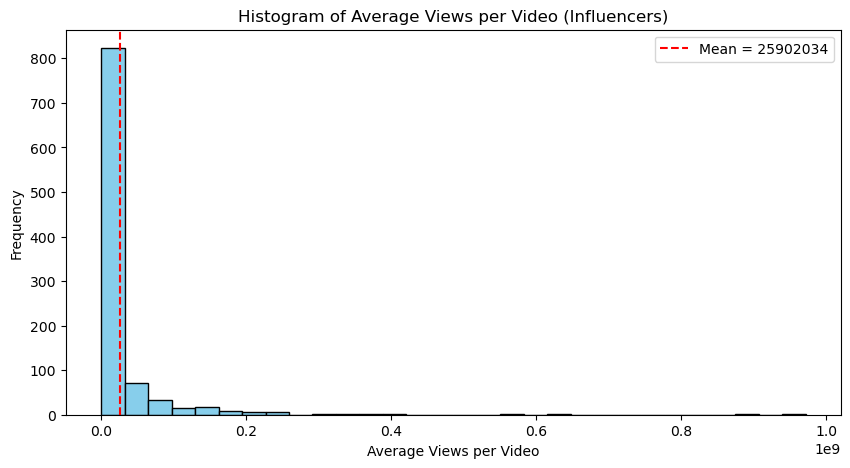

Shapiro-Wilk normality test p-value: nan
Interpretation: Data is not normally distributed.

One-sided t-test (H1: mean > 10,000,000)
t-statistic = nan, p-value = nan
Conclusion: There is not enough evidence to say the average views exceed 10,000,000.


In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("youtube.csv")

# Convert numeric columns
df['Subscribers'] = df['Subscribers'].replace(',', '', regex=True).astype(float)
df['Video Views'] = df['Video Views'].replace(',', '', regex=True).astype(float)
df['Video Count'] = df['Video Count'].replace(',', '', regex=True).astype(float)

# Define influencers: Subscribers > 1,000,000
influencers = df[df['Subscribers'] > 1_000_000].copy()

# Calculate average views per video
influencers['Avg_Views'] = influencers['Video Views'] / influencers['Video Count']

# Randomly sample at least 1000 videos (or all if dataset smaller)
sample_size = min(1000, len(influencers))
sample = influencers['Avg_Views'].sample(n=sample_size, random_state=42)

# Summary statistics
mean_val = sample.mean()
std_val = sample.std()
n = len(sample)
sem = std_val / np.sqrt(n)
moe = 1.96 * sem  # 95% Margin of Error
ci_lower = mean_val - moe
ci_upper = mean_val + moe

print("Summary statistics for Avg Views per Video (sample):")
print(f"Mean = {mean_val:.2f}")
print(f"Std Dev = {std_val:.2f}")
print(f"n = {n}")
print(f"Margin of Error (95% CI) = ±{moe:.2f}")
print(f"95% CI = [{ci_lower:.2f}, {ci_upper:.2f}]")

# Histogram of the sampling distribution
plt.figure(figsize=(10,5))
plt.hist(sample, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Average Views per Video')
plt.ylabel('Frequency')
plt.title('Histogram of Average Views per Video (Influencers)')
plt.axvline(mean_val, color='red', linestyle='dashed', label=f'Mean = {mean_val:.0f}')
plt.legend()
plt.show()

# Normality check using Shapiro-Wilk
shapiro_p = stats.shapiro(sample)[1]
print(f"Shapiro-Wilk normality test p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Interpretation: Data is approximately normally distributed.")
else:
    print("Interpretation: Data is not normally distributed.")

# One-sided t-test: H0: mean <= 10,000,000, H1: mean > 10,000,000
t_stat, p_two_sided = stats.ttest_1samp(sample, 10_000_000)
p_one_sided = p_two_sided / 2 if mean_val > 10_000_000 else 1 - (p_two_sided / 2)

print(f"\nOne-sided t-test (H1: mean > 10,000,000)")
print(f"t-statistic = {t_stat:.2f}, p-value = {p_one_sided:.4f}")

if p_one_sided < 0.05:
    print("Conclusion: The average views per video is significantly greater than 10,000,000.")
else:
    print("Conclusion: There is not enough evidence to say the average views exceed 10,000,000.")


Summary statistics for Avg Views per Video (sample):
Mean = 25902034.13
Std Dev = 72308550.85
n = 991
Margin of Error (95% CI) = ±4502035.36
95% CI = [21399998.77, 30404069.50]


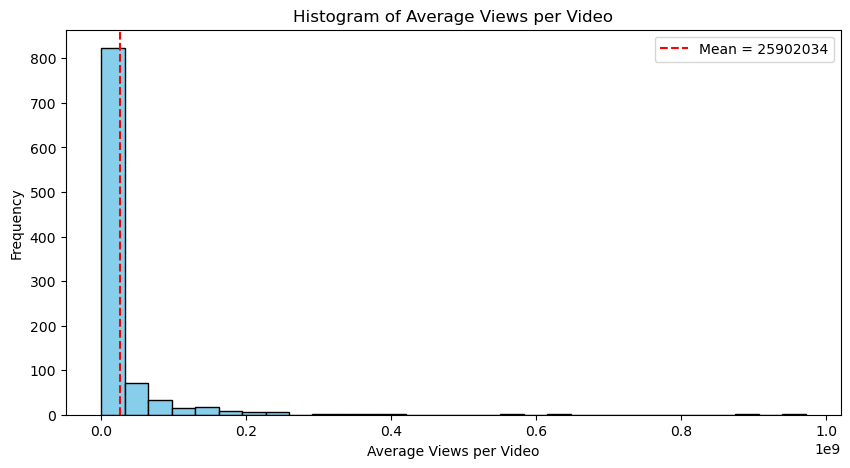

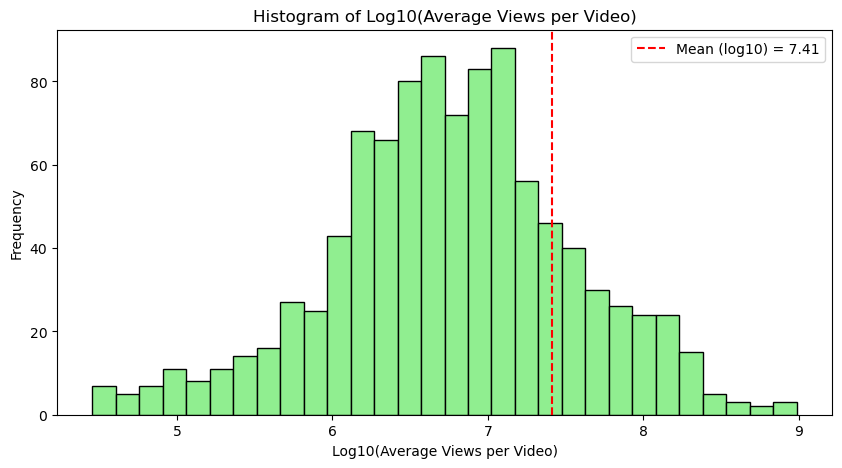

Shapiro-Wilk normality test p-value: 1.21e-50
Interpretation: Data is not normally distributed.
One-sided t-test (H1: mean > 10,000,000)
t-statistic = 6.92, p-value = 3.97e-12
Conclusion: The average views per video is significantly greater than 10,000,000.


In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("youtube.csv")

# Convert numeric columns and handle errors
df['Subscribers'] = pd.to_numeric(df['Subscribers'].replace(',', '', regex=True), errors='coerce')
df['Video Views'] = pd.to_numeric(df['Video Views'].replace(',', '', regex=True), errors='coerce')
df['Video Count'] = pd.to_numeric(df['Video Count'].replace(',', '', regex=True), errors='coerce')

# Filter influencers: Subscribers > 1,000,000
influencers = df[df['Subscribers'] > 1_000_000].copy()

# Remove rows with missing or invalid data
influencers = influencers.dropna(subset=['Video Views', 'Video Count'])
influencers = influencers[influencers['Video Count'] > 0]

# Check if there are valid influencers
if len(influencers) == 0:
    raise ValueError("No valid influencers with Subscribers > 1,000,000 and Video Count > 0.")

# Calculate average views per video
influencers['Avg_Views'] = influencers['Video Views'] / influencers['Video Count']

# Randomly sample at least 1000 videos (or all if smaller)
sample_size = min(1000, len(influencers))
sample = influencers['Avg_Views'].sample(n=sample_size, random_state=42)

# Summary statistics
mean_val = sample.mean()
std_val = sample.std()
n = len(sample)
sem = std_val / np.sqrt(n)
moe = 1.96 * sem  # 95% Margin of Error
ci_lower = mean_val - moe
ci_upper = mean_val + moe

print("Summary statistics for Avg Views per Video (sample):")
print(f"Mean = {mean_val:.2f}")
print(f"Std Dev = {std_val:.2f}")
print(f"n = {n}")
print(f"Margin of Error (95% CI) = ±{moe:.2f}")
print(f"95% CI = [{ci_lower:.2f}, {ci_upper:.2f}]")

# Regular histogram
plt.figure(figsize=(10,5))
plt.hist(sample, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Average Views per Video')
plt.ylabel('Frequency')
plt.title('Histogram of Average Views per Video')
plt.axvline(mean_val, color='red', linestyle='dashed', label=f'Mean = {mean_val:.0f}')
plt.legend()
plt.show()

# Log-transformed histogram
sample_log = np.log10(sample)
plt.figure(figsize=(10,5))
plt.hist(sample_log, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Log10(Average Views per Video)')
plt.ylabel('Frequency')
plt.title('Histogram of Log10(Average Views per Video)')
plt.axvline(np.log10(mean_val), color='red', linestyle='dashed', label=f'Mean (log10) = {np.log10(mean_val):.2f}')
plt.legend()
plt.show()

# Normality check using Shapiro-Wilk
shapiro_p = stats.shapiro(sample)[1]
print(f"Shapiro-Wilk normality test p-value: {shapiro_p:.2e}")
if shapiro_p > 0.05:
    print("Interpretation: Data is approximately normally distributed.")
else:
    print("Interpretation: Data is not normally distributed.")

# One-sided t-test: H0: mean <= 10,000,000, H1: mean > 10,000,000
t_stat, p_two_sided = stats.ttest_1samp(sample, 10_000_000)
p_one_sided = p_two_sided / 2 if mean_val > 10_000_000 else 1 - (p_two_sided / 2)

print(f"One-sided t-test (H1: mean > 10,000,000)")
print(f"t-statistic = {t_stat:.2f}, p-value = {p_one_sided:.2e}")
if p_one_sided < 0.05:
    print("Conclusion: The average views per video is significantly greater than 10,000,000.")
else:
    print("Conclusion: There is not enough evidence to say the average views exceed 10,000,000.")


# Conclusion: We analyzed a sample of 991 videos from influencers with over 1,000,000 subscribers to determine if the average views per video exceed 10,000,000.
# Summary statistics:
# Mean average views = 25,902,034.13( This is the typical number of views a video gets. If all videos were “evened out,” each one would get about 26 million views.)
# Standard deviation = 72,308,550.85(This shows how spread out the views are. Some videos get a lot more views, some a lot less, so there’s a lot of variation around the average.)
# Margin of Error (95% CI) = ±4,502,035.36, giving a confidence interval of [21,399,998.77, 30,404,069.50](This tells us how precise our estimate of the average is. We can be 95% confident that the true average views per video falls between 21,399,998 and 30,404,069.)

# Shapiro-Wilk normality test: p-value = 1.21e-50, indicating the data is not normally distributed, which is expected because view counts are highly skewed by very popular videos. One-sided t-test (H₁: mean > 10,000,000) gives t = 6.92 and p = 3.97e-12. Since the p-value is extremely small, we reject the null hypothesis.

# Conclusion:There is strong statistical evidence that the average number of views per video for these influencers is significantly greater than 10,000,000. While the results are influenced by videos with extremely high views and potentially by video category, the pattern is clear: high-subscriber influencers receive very high engagement on their videos.

# The sample size is 991 instead of 1000 because some videos were removed during data cleaning due to missing or invalid values for Video Views or Video Count, or because their Video Count was zero.